In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with the Vertex AI PaLM API & Python SDK

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/getting-started/getting_started_sdk.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/getting-started/getting_started_sdk.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/getting-started/getting_started_sdk.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      Open in Vertex AI Workbench
    </a>
  </td>
</table>

## Overview

### What are LLMs?
Large language models (LLMs) are deep learning models trained on massive datasets of text. LLMs can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems. 

### PaLM
Following its predecessor, [PaLM](https://ai.googleblog.com/2022/04/pathways-language-model-palm-scaling-to.html), [PaLM 2](https://ai.google/discover/palm2) is Google's next generation large language model that builds on Google’s legacy of breakthrough research in machine learning and responsible AI. PaLM 2 excels at tasks like advanced reasoning, translation, and code generation because of how it was built. 

PaLM 2 [excels](https://ai.google/static/documents/palm2techreport.pdf) at advanced reasoning tasks, including code and math, classification and question answering, translation and multilingual proficiency, and natural language generation better than our previous state-of-the-art LLMs, including PaLM. It can accomplish these tasks because of the way it was built – bringing together compute-optimal scaling, an improved dataset mixture, and model architecture improvements.

PaLM 2 is grounded in Google’s approach to building and deploying AI responsibly. It was evaluated rigorously for its potential harms and biases, capabilities and downstream uses in research and in-product applications. It’s being used in other state-of-the-art models, like Med-PaLM 2 and Sec-PaLM, and is powering generative AI features and tools at Google, like Bard and the PaLM API.

PaLM is pre-trained on a wide range of text data using an unsupervised learning approach, without any specific task. During this pre-training process, PaLM learns to predict the next word in a sentence, given the preceding words. This enables the model to generate coherent, fluent text resembling human writing.
This large size enables it to learn complex patterns and relationships in language and generate high-quality text for various applications. This is why models like PaLM are referred to as "foundational models."

Creating an LLM requires massive amounts of data, significant compute resources, and specialized skills. Because LLMs require a big investment to create, they target broad rather than specific use cases. On Vertex AI, you can customize a foundation model for more specific tasks or knowledge domains by using prompt design and model tuning.

### Vertex AI PaLM API
The Vertex AI PaLM API, [released on May 10, 2023](https://cloud.google.com/vertex-ai/docs/generative-ai/release-notes#may_10_2023), is powered by [PaLM 2](https://ai.google/discover/palm2).

### Using Vertex AI PaLM API

You can interact with the Vertex AI PaLM API using the following methods:

* Use the [Generative AI Studio](https://cloud.google.com/generative-ai-studio) for quick testing and command generation.
* Use cURL commands in Cloud Shell.
* Use the Python SDK in a Jupyter notebook

This notebook focuses on using the Python SDK to call the Vertex AI PaLM API. For more information on using Generative AI Studio without writing code, you can explore [Getting Started with the UI instructions](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/getting-started/getting_started_ui.md)


For more information, check out the [documentation on generative AI support for Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview).

### Objectives

In this tutorial, you will learn how to use PaLM API with the Python SDK and explore its various parameters.

By the end of the notebook, you should be able to understand various nuances of generative model parameters like `temperature`, `top_k`, `top_p`, and how each parameter affects the results.

The steps performed include:

- Installing the Python SDK 
- Using Vertex AI PaLM API
  - Text generation model with `text-bison@001`
    - Understanding model parameters (`temperature`, `max_output_token`,  `top_k`, `top_p`)
  - Chat model with `chat-bison@001`
  - Embeddings model with `textembedding-gecko@001`
  

### Costs
This tutorial uses billable components of Google Cloud:

* Vertex AI Generative AI Studio

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

### Data security
**Q: Does Google use customer data to improve its foundation models?**  
A: No, Google does not use customer data to improve foundation models. Customer data is only used to generate a response from the model.

**Q: Do Google employees see data that I submit to the model?**  
A: No, Google employees have no access to customer data and all data is encrypted in-transit, in-use, and at-rest. 

**Q: Does Google store any of the customer data that is sent to the model?**  
A: No, Google does not store customer data. However, Google may temporarily cache customer data for the duration of the request, such as prompt tuning pipeline and batch prediction. 

**Q: Does Google log data?**  
A: No, Google does not log customer data. System-level logs help Google ensure system health and availability.

### Responsible AI
Large language models (LLMs) can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems. At the same time, as an early-stage technology, its evolving capabilities and uses create potential for misapplication, misuse, and unintended or unforeseen consequences. Large language models can generate output that you don't expect, including text that's offensive, insensitive, or factually incorrect.

What's more, the incredible versatility of LLMs is also what makes it difficult to predict exactly what kinds of unintended or unforeseen outputs they might produce. Given these risks and complexities, the PaLM API is designed with [Google's AI Principles](https://ai.google/principles/) in mind. However, it is important for developers to understand and test their models to deploy safely and responsibly. To aid developers, the Generative AI Studio has built-in content filtering, and the PaLM API has safety attribute scoring to help customers test Google's safety filters and define confidence thresholds that are right for their use case and business. Please refer to the [Safety filters and attributes](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_filters_and_attributes) section to learn more.

When the PaLM API is integrated into a customer's unique use case and context, additional responsible AI considerations and [PaLM limitations](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#palm_limitations) may need to be considered. We encourage customers to leverage fairness, interpretability, privacy and security [recommended practices](https://ai.google/responsibilities/responsible-ai-practices/).

## Getting Started

### Install Vertex AI SDK

In [1]:
!pip install google-cloud-aiplatform --upgrade --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.0 MB/s eta 0:00:0000:010:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# Automatically restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Authenticating your notebook environment
* If you are using **Colab** to run this notebook, uncomment the cell below and continue.
* If you are using **Vertex AI Workbench**, check out the setup instructions [here](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env).

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

## Vertex AI PaLM API models

The Vertex AI PaLM API enables you to test, customize, and deploy instances of Google’s large language models (LLM) called as PaLM,  so that you can leverage the capabilities of PaLM in your applications.

### Model naming scheme
Foundation model names have three components: use case, model size, and version number. The naming convention is in the format:  
`<use case>-<model size>@<version number>`

For example, text-bison@001 represents the Bison text model, version 001.

The model sizes are as follows:
- **Bison**: The best value in terms of capability and cost.
- **Gecko**: The smallest and cheapest model for simple tasks.

### Available models

The Vertex AI PaLM API currently supports three models:

*   `text-bison@001` : Fine-tuned to follow natural language instructions and is suitable for a variety of language tasks.
*   `chat-bison@001` : Fine-tuned for multi-turn conversation use cases like building a chatbot.
*   `textembedding-gecko@001` : Returns model embeddings for text inputs.

You can find more information about the properties of these [foundational models in the Generative AI Studio documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models).



### Import libraries

In [1]:
from vertexai.preview.language_models import TextGenerationModel,\
                                            ChatModel,\
                                            InputOutputTextPair,\
                                            TextEmbeddingModel

from IPython.display import display, Markdown
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

## Text generation with `text-bison@001`

The text generation model from PaLM API that you will use in this notebook is `text-bison@001`.
It is fine-tuned to follow natural language instructions and is suitable for a variety of language tasks, such as:

- Classification
- Sentiment analysis
- Entity extraction
- Extractive question-answering
- Summarization
- Re-writing text in a different style
- Ad copy generation
- Concept ideation
- Concept simplification

#### Load model

In [2]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

#### Prompt design
Prompt design is the process of creating prompts that elicit the desired response from a language model. Prompt design is an important part of using language models because it allows non-specialists to control the output of the model with minimal overhead. By carefully crafting the prompts, you can nudge the model to generate a desired result. Prompt design can be an efficient way to experiment with adapting an LLM for a specific use case. The iterative process of repeatedly updating prompts and assessing the model’s responses is sometimes called prompt engineering.

#### Hello PaLM

Create your first prompt and send it to the text generation model.

In [3]:
prompt = "What is a large language model?"

response = generation_model.predict(
    prompt=prompt
)

print(response.text)

A large language model (LLM) is a type of artificial intelligence (AI) model that can understand and generate human language. LLMs are trained on massive datasets of text and code, and they can learn to perform a wide variety of tasks, such as translating languages, writing different kinds of creative content, and answering your questions in an informative way.

LLMs are still under development, but they have the potential to revolutionize many industries. For example, LLMs could be used to create more accurate and personalized customer service experiences, to help doctors diagnose and treat diseases, and to even write entire books and movies.




#### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings.

In [4]:
topic_of_interest = "quantum computers"

response = generation_model.predict(
    prompt=f"Give me a list of three reasons why {topic_of_interest} might be important."
)

print(response.text)

1. **Quantum computers can solve certain problems much faster than classical computers.** This is because quantum computers can use superposition, which allows them to store and process information in a way that classical computers cannot. This can give quantum computers a huge advantage in solving certain problems, such as finding the prime factors of a number or simulating physical systems.
2. **Quantum computers can be used to create new kinds of encryption.** This is because quantum computers can break certain types of encryption that are currently considered secure. This could have a major impact on the security of the internet and other critical systems.
3. **Quantum computers could lead


For easier reading, you can also render Markdown in Jupyter:

In [5]:
display(Markdown(response.text))

1. **Quantum computers can solve certain problems much faster than classical computers.** This is because quantum computers can use superposition, which allows them to store and process information in a way that classical computers cannot. This can give quantum computers a huge advantage in solving certain problems, such as finding the prime factors of a number or simulating physical systems.
2. **Quantum computers can be used to create new kinds of encryption.** This is because quantum computers can break certain types of encryption that are currently considered secure. This could have a major impact on the security of the internet and other critical systems.
3. **Quantum computers could lead

### Model parameters for `text-bison@001`

You can customize how the PaLM API behaves in response to your prompt by using the following parameters for `text-bison@001`:

 - `temperature`: higher means more "creative" responses
 - `max_output_tokens`: sets the max number of tokens in the output
 - `top_p`: higher means it will pull from more possible next tokens, based on cumulative probability
 - `top_k`: higher means it will sample from more possible next tokens
 
The section below covers each parameter and how to use them.

#### The `temperature` parameter (range: 0.0 - 1.0, default 0)

##### What is _temperature_?
The temperature is used for sampling during the response generation, which occurs when top_p and top_k are applied. Temperature controls the degree of randomness in token selection.

##### How does _temperature_ affect the response?
Lower temperatures are good for prompts that require a more deterministic and less open-ended response. In comparison, higher temperatures can lead to more "creative" or diverse results. A temperature of `0` is deterministic: the highest probability response is always selected. For most use cases, try starting with a temperature of `0.2`.

A higher temperature value will result in a more exploratative output, with a higher likelihood of generating rare or unusual words or phrases. Conversely, a lower temperature value will result in a more conservative output, with a higher likelihood of generating common or expected words or phrases.

##### Example:

For example,

`temperature = 0.0`:

* _The cat sat on the couch, watching the birds outside._
* _The cat sat on the windowsill, basking in the sun._

`temperature = 0.9`:

* _The cat sat on the moon, meowing at the stars._
* _The cat sat on the cheeseburger, purring with delight._

**Note**: It's important to note that while the temperature parameter can help generate more diverse and interesting text, it can also increase the likelihood of generating nonsensical or inappropriate text (i.e. hallucinations). Therefore, it's important to use it carefully and with consideration for the desired outcome.

For more information on the `temperature` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

If you run the following cell multiple times, it should always return the same response, as `temperature=0` is deterministic.

In [6]:
temp_val = 0.0
prompt_temperature = "Complete the sentence: As I prepared the picture frame, I reached into my toolkit to fetch my:"

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 0.0]
As I prepared the picture frame, I reached into my toolkit to fetch my hammer.


If you run the following cell multiple times, it may return different responses, as higher temperature values can lead to more diverse results, even though the prompt is the same as the above cell.

In [7]:
temp_val = 1.0

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 1.0]
As I prepared the picture frame, I reached into my toolkit to fetch my tape measure. This is because a tape measure is a tool used to measure distances and is typically included in a toolkit for home improvement projects.


#### The `max_output_tokens` parameter (range: 1 - 1024, default 1)

##### Tokens
A single token may be smaller than a word. For example, a token is approximately four characters. So 100 tokens correspond to roughly 60-80 words. It's essential to be aware of the token sizes as models have a limit on input and output tokens.

##### What is _max_output_tokens_?
`max_output_tokens` is the maximum number of tokens that can be generated in the response.

##### How does _max_output_tokens_ affect the response?

Specify a lower value for shorter responses and a higher value for longer responses. A token may be smaller than a word. A token is approximately four characters. 100 tokens correspond to roughly 60-80 words.

For more information on the `max_output_tokens` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [ ]:
max_output_tokens_val = 5

response = generation_model.predict(
    prompt="What is a large language model?",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

In [ ]:
max_output_tokens_val = 500

response = generation_model.predict(
    prompt="What is a large language model?",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

#### The `top_p` parameter (range: 0.0 - 1.0, default 0.95)

##### What is _top_p_?
`top_p` controls how the model selects tokens for output by adjusting the probability distribution of the next word in the generated text based on a cumulative probability cutoff. Specifically, it selects the smallest set of tokens whose cumulative probability exceeds the given cutoff probability _p_, and samples from this set uniformly.


For example, suppose tokens A, B, and C have a probability of 0.3, 0.2, and 0.1, and the `top_p` value is 0.5. In that case, the model will select either A or B as the next token (using temperature) and not consider C, because the cumulative probability of top_p is <= 0.5. Specify a lower value for less random responses and a higher value for more random responses.

##### How does _top_p_ affect the response?

The `top_p` parameter is used to control the diversity of the generated text. A higher `top_p` parameter value results in more "diverse" and "interesting" outputs, with the model being allowed to sample from a larger pool of possibilities. In contrast, a lower `top_p` parameter value resulted in more predictable outputs, with the model being constrained to a smaller set of possible tokens.


##### Example:

`top_p = 0.1`:

- The cat sat on the mat.
- The cat sat on the floor.

`top_p = 0.9`:

- The cat sat on the windowsill, soaking up the sun's rays.
- The cat sat on the edge of the bed, watching the birds outside.

For more information on the `top_p` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [ ]:
top_p_val = 0.0
prompt_top_p_example = "Create a marketing campaign for jackets that involves blue elephants and avocados."

response = generation_model.predict(
    prompt=prompt_top_p_example,
    temperature=0.9,
    top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

In [ ]:
top_p_val = 1.0

response = generation_model.predict(
    prompt=prompt_top_p_example,
    temperature=0.9,
    top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

#### The `top_k` parameter (range: 0.0 - 40, default 40)

##### What is _top_k_?
`top_k` changes how the model selects tokens for output. A `top_k` of 1 means the selected token is the most probable among all tokens in the model's vocabulary (also called greedy decoding). In contrast, a `top_k` of 3 means that the next token is selected from the top 3 most probable tokens (using temperature). For each token selection step, the `top_k` tokens with the highest probabilities are sampled. Then tokens are further filtered based on `top_p` with the final token selected using temperature sampling.

##### How does _top_k_ affect the response?

Specify a lower value for less random responses and a higher value for more random responses.

For more information on the `top_k` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [ ]:
prompt_top_k_example = "Write a 2-day itinerary for France."
top_k_val = 1

response = generation_model.predict(
    prompt=prompt_top_k_example,
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
print(response.text)

In [ ]:
top_k_val = 40

response = generation_model.predict(
    prompt=prompt_top_k_example,
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val,
)

print(f"[top_k = {top_k_val}]")
print(response.text)

## Chat model with `chat-bison@001`

The `chat-bison@001` model lets you have a freeform conversation across multiple turns. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application, use the `chat-bison@001` model because it has been fine-tuned for multi-turn conversation use cases.

In [8]:
chat_model = ChatModel.from_pretrained("chat-bison@001")

chat = chat_model.start_chat()

print(chat.send_message("""
My name is Larry. 
"""))

Hi Larry, it's nice to meet you. I'm Bard, a large language model, also known as a conversational AI or chatbot trained to be informative and comprehensive. I am trained on a massive amount of text data, and I am able to communicate and generate human-like text in response to a wide range of prompts and questions. For example, I can provide summaries of factual topics or create stories.


As shown below, the model should respond based on what was previously said in the conversation:

In [9]:
print(chat.send_message("""
What's my name again?
"""))

Your name is Larry. It's nice to meet you, Larry.


### Advanced Chat model with the SDK
You can also provide a `context` and `examples` to the model. The model will then respond based on the provided context and examples. You can also use `temperature`, `max_output_tokens`, `top_p`, and `top_k`. These parameters should be used when you start your chat with `chat_model.start_chat()`.

For more information on chat models, please refer to the [documentation on chat model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#chat_model_parameters).

In [ ]:
chat = chat_model.start_chat(
    context="My name is Ned. You are my personal assistant. My favorite movies are Lord of the Rings and Hobbit.",
    examples=[
        InputOutputTextPair(
            input_text="Who do you work for?",
            output_text="I work for Ned.",
        ),
        InputOutputTextPair(
            input_text="What do I like?",
            output_text="Ned likes watching movies.",
        ),
    ],
    temperature=0.3,
    max_output_tokens=200,
    top_p=0.8,
    top_k=40
)
print(chat.send_message("Are my favorite movies based on a book series?"))

In [ ]:
print(chat.send_message("When where these books published?"))

## Embedding model with `textembedding-gecko@001`

Text embeddings are a dense, often low-dimensional, vector representation of a piece of content such that, if two pieces of content are semantically similar, their respective embeddings are located near each other in the embedding vector space. This representation can be used to solve common NLP tasks, such as:

* **Semantic search**: Search text ranked by semantic similarity.
* **Recommendation**: Return items with text attributes similar to the given text.
* **Classification**: Return the class of items whose text attributes are similar to the given text.
* **Clustering**: Cluster items whose text attributes are similar to the given text.
* **Outlier Detection**: Return items where text attributes are least related to the given text.

Please refer to the [text embedding model documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings) for more information.

In [10]:
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

embeddings = embedding_model.get_embeddings(["What is life?"])

for embedding in embeddings:
    vector = embedding.values
    print(f"Length = {len(vector)}")
    print(vector)

Length = 768
[0.010562753304839134, 0.04915031045675278, -0.022224493324756622, 0.0208794716745615, 0.024389723315835, 0.010366306640207767, 0.023919280618429184, 0.022391626611351967, -0.031569067388772964, 0.023535897955298424, -0.017047161236405373, -0.014345862902700901, 0.044956106692552567, 0.027327297255396843, -0.03314697742462158, -0.028214626014232635, -0.035373710095882416, -0.05229683220386505, 0.017105583101511, -0.03780610114336014, -0.07891207933425903, -0.01173518318682909, -0.01629730500280857, -0.04353305324912071, 0.013023999519646168, -0.10904901474714279, -0.0341256819665432, -0.0025329082272946835, -0.036971937865018845, -0.027775181457400322, 0.02332289144396782, 0.0052000475116074085, 0.005503748077899218, 0.0047489493153989315, -0.029920609667897224, 0.07563772797584534, 0.0007565636187791824, 0.03501711040735245, 0.02154686115682125, -0.000812096637673676, 0.06169590726494789, -0.024313345551490784, 0.03736764192581177, -0.0005869767046533525, -0.0228724572807

#### Embeddings and Pandas DataFrames

If your text is stored in a column of a DataFrame, you can create a new column with the embeddings with the example below.

In [11]:
text = ["i really enjoyed the movie last night", 
        "so many amazing cinematic scenes yesterday", 
        "had a great time writing my Python scripts a few days ago",
        "huge sense of relief when my .py script finally ran without error",
        "O Romeo, Romeo, wherefore art thou Romeo?"
       ]

df = pd.DataFrame(text, 
                  columns=["text"])
df

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"


Create a new column, `embeddings`, using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function in pandas with the embeddings model.

In [12]:
df["embeddings"] = [emb.values for emb in embedding_model.get_embeddings(df.text.values)]
df

,text,embeddings
0,i really enjoyed the movie last night,"[-0.01542604435235262, 0.010494514368474483, 0..."
1,so many amazing cinematic scenes yesterday,"[-0.0445345863699913, 0.03854769468307495, -0...."
2,had a great time writing my Python scripts a f...,"[-0.002230646787211299, -0.00943742785602808, ..."
3,huge sense of relief when my .py script finall...,"[-0.0167002584785223, 0.00996268168091774, 0.0..."
4,"O Romeo, Romeo, wherefore art thou Romeo?","[0.04244288057088852, -0.028772803023457527, 0..."


#### Comparing similarity of text examples using cosine similarity

By converting text into embeddings, you can compute similarity scores. There are many ways to compute similarity scores, and one common technique is using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In the example from above, two of the sentences in the `text` column relate to enjoying a _movie_, and the other two relates to enjoying _coding_. Cosine similarity scores should be higher (closer to 1.0) when doing pairwise comparisons between semantically-related sentences, and scores should be lower between semantically-different sentences. 

The DataFrame output below shows the resulting cosine similarity scores between the embeddings:

In [13]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,i really enjoyed the movie last night,so many amazing cinematic scenes yesterday,had a great time writing my Python scripts a few days ago,huge sense of relief when my .py script finally ran without error,"O Romeo, Romeo, wherefore art thou Romeo?"
i really enjoyed the movie last night,1.000000,0.719837,0.631101,0.552196,0.459453
so many amazing cinematic scenes yesterday,0.719837,1.000000,0.622367,0.564557,0.524301
had a great time writing my Python scripts a few days ago,0.631101,0.622367,1.000000,0.739008,0.449453
huge sense of relief when my .py script finally ran without error,0.552196,0.564557,0.739008,1.000000,0.436083
"O Romeo, Romeo, wherefore art thou Romeo?",0.459453,0.524301,0.449453,0.436083,1.000000


To make this easier to understand, you can use a heatmap. Naturally, text is most similar when they are identical (score of 1.0). The next highest scores are when sentences are semantically similar. The lowest scores are when sentences are quite different in meaning.

[Text(0.5, 1, 'i really enjoyed the movie last night'),
 Text(1.5, 1, 'so many amazing cinematic scenes yesterday'),
 Text(2.5, 1, 'had a great time writing my Python scripts a few days ago'),
 Text(3.5, 1, 'huge sense of relief when my .py script finally ran without error'),
 Text(4.5, 1, 'O Romeo, Romeo, wherefore art thou Romeo?')]

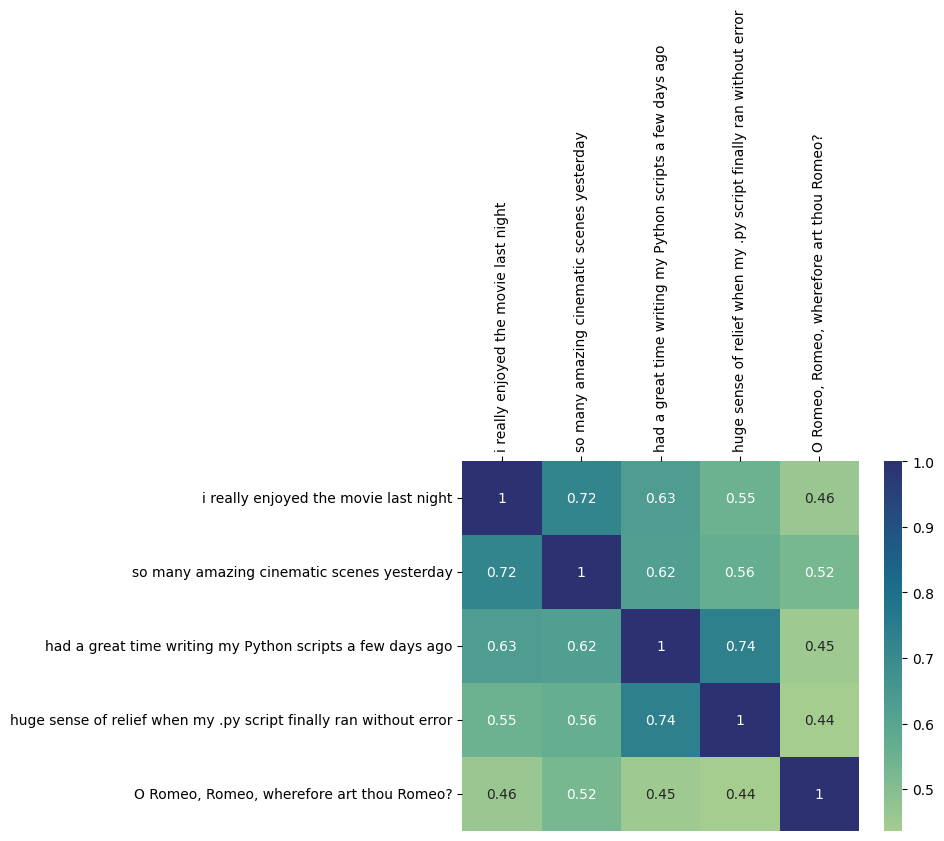

In [14]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)